# MNIST

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import os

dest_directory = 'dataset/mnist'
# check the directory
if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)
# import data
mnist = input_data.read_data_sets("dataset/mnist/", one_hot=True)


/Users/unahsu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting dataset/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting dataset/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting dataset/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting dataset/mnist/t10k-labels-idx1-ubyte.gz


In [2]:
# Create the model (Softmax Regression)

x = tf.placeholder(tf.float32,[None, 784])  # flatten into vector of 28 x 28 = 784
y_true = tf.placeholder(tf.float32, [None, 10])  # true answers
W = tf.Variable(tf.zeros([784, 10]))  # Weights
b = tf.Variable(tf.zeros([10]))  # bias
y_pred = tf.matmul(x, W) + b  # y = Wx + b

# Define loss and optimizer

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_true, 
                                            logits=y_pred))  # our loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(
    cross_entropy)  # our optimizer

In [3]:
# Training and Testing

with tf.Session() as sess:
    # initialize the variables we created
    sess.run(tf.global_variables_initializer())  
    # run the training step 1000 times
    for _ in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        # feed training data x and y_ for training
        sess.run(train_step, feed_dict={
            x: batch_xs,
            y_true: batch_ys
        })  

    # Testing
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy = sess.run(accuracy_op, feed_dict={
          x: mnist.test.images,
          y_true: mnist.test.labels
    })
    # feed our testing data for testing
    print('Accuracy: %.1f%%' % (accuracy * 100)) 

Accuracy: 91.8%


### Multilayer Convolutional Network on MNIST

In [4]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [5]:
# Our convolutions uses a stride of one and are zero padded so that the output is the same size as the input.
# Our pooling is plain old max pooling over 2x2 blocks.

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
# [batch_size, height, width, channel]
x_image = tf.reshape(x, [-1, 28, 28, 1])

# First Convolutional Layer
W_conv1 = weight_variable([5, 5, 1, 32]) # (filter_height, filter_width, number of input channels, number of output channels)
b_conv1 = bias_variable([32])

# convolve x_image with the weight tensor, add the bias, then apply the ReLU function
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# and finally max pool 
h_pool1 = max_pool_2x2(h_conv1) # It will reduce the image size to "14x14"

In [7]:
# Second Convolutional Layer

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2) # It will reduce the image size to "7x7"

In [8]:
# Densely Connected Layer

W_fc1 = weight_variable([7 * 7 * 64, 1024]) 
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64]) # flatten
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [9]:
# Dropout

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [10]:
# Readout Layer

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [11]:
# Define loss and optimizer

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_conv)) # our loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) # our optimizer
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Cifar-10

### K Nearest Neighbors (KNN) on CIFAR-10

In [13]:
# Loading Data
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
import math

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# convert class vectors to binary vectors
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 128s 1us/step
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [14]:
# Data Preprocessing
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

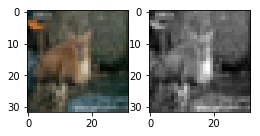

In [15]:
import matplotlib.pyplot as plt

# transform an 3-channel image into 1-channel
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r = np.asarray(.3, dtype=dtype)
    g = np.asarray(.59, dtype=dtype)
    b = np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

X_train_gray = grayscale(X_train)
X_test_gray = grayscale(X_test)

# plot a randomly chosen image
img = round(np.random.rand() * X_train.shape[0])
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(X_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(
    X_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

### Feature Selection

In [16]:
# The code is credit to: "http://www.itdadao.com/articles/c15a1243072p0.html"
def getHOGfeat(image,
               stride=8,
               orientations=8,
               pixels_per_cell=(8, 8),
               cells_per_block=(2, 2)):
    cx, cy = pixels_per_cell
    bx, by = cells_per_block
    sx, sy, sz = image.shape
    n_cellsx = int(np.floor(sx // cx))  # number of cells in x
    n_cellsy = int(np.floor(sy // cy))  # number of cells in y
    n_blocksx = (n_cellsx - bx) + 1
    n_blocksy = (n_cellsy - by) + 1
    gx = np.zeros((sx, sy), dtype=np.double)
    gy = np.zeros((sx, sy), dtype=np.double)
    eps = 1e-5
    grad = np.zeros((sx, sy, 2), dtype=np.double)
    for i in range(1, sx - 1):
        for j in range(1, sy - 1):
            gx[i, j] = image[i, j - 1] - image[i, j + 1]
            gy[i, j] = image[i + 1, j] - image[i - 1, j]
            grad[i, j, 0] = np.arctan(gy[i, j] / (gx[i, j] + eps)) * 180 / math.pi
            if gx[i, j] < 0:
                grad[i, j, 0] += 180
            grad[i, j, 0] = (grad[i, j, 0] + 360) % 360
            grad[i, j, 1] = np.sqrt(gy[i, j]**2 + gx[i, j]**2)
    normalised_blocks = np.zeros((n_blocksy, n_blocksx, by * bx * orientations))

    for y in range(n_blocksy):
        for x in range(n_blocksx):
            block = grad[y * stride:y * stride + 16, x * stride:x * stride + 16]
            hist_block = np.zeros(32, dtype=np.double)
            eps = 1e-5
            for k in range(by):
                for m in range(bx):
                    cell = block[k * 8:(k + 1) * 8, m * 8:(m + 1) * 8]
                    hist_cell = np.zeros(8, dtype=np.double)
                    for i in range(cy):
                        for j in range(cx):
                            n = int(cell[i, j, 0] / 45)
                            hist_cell[n] += cell[i, j, 1]
                    hist_block[(k * bx + m) * orientations:(k * bx + m + 1) * orientations] = hist_cell[:]
            normalised_blocks[y, x, :] = hist_block / np.sqrt(
                hist_block.sum()**2 + eps)

    return normalised_blocks.ravel()